# E-Commerce transnational Data analytics for the year 2010-2011

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail and the data has been fetched from the kaggle dataset .

With the data I am trying to understand the scale of online market which existed at around 2010 and 2011.For this I will basically use the Pandas,Matplotlib and seaborn library to explore and graph the dat
The course [Data Analysis with Python: Zero to Pandas] was really helpful to me during this exploration.

## Downloading the Dataset

 https://www.kaggle.com/datasets?fileType=csv

In [42]:
!pip install jovian opendatasets --upgrade --quiet

In [43]:
dataset_url = 'https://www.kaggle.com/carrie1/ecommerce-data' 

In [44]:
import opendatasets as od 
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pramit2019
Your Kaggle Key: ········


100%|██████████| 7.20M/7.20M [00:00<00:00, 53.7MB/s]

In [45]:
data_dir = './ecommerce-data'

In [46]:
import os
os.listdir(data_dir)

['data.csv']

In [47]:
project_name = "Ecommerce_Data_analytics"

In [48]:
!pip install jovian --upgrade -q

In [49]:
import jovian

In [50]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailatpramit/ecommerce-data-analytics" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/mailatpramit/ecommerce-data-analytics


'https://jovian.ai/mailatpramit/ecommerce-data-analytics'

## Data Preparation and Cleaning

We will read csv file using pandas library and perform transformation on data for any missing/invalid data.Also we will add new column if it requires to be added to add the clarity to the data.

In [51]:
import pandas as pd

In [53]:
df=pd.read_csv("./ecommerce-data/data.csv",encoding='unicode_escape')


In [54]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [56]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [57]:
df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
243656,558475,84569A,PACK 3 IRON ON DOG PATCHES,8,6/29/2011 15:58,0.83,NaN,United Kingdom
370427,569137,22308,TEA COSY BLUE STRIPE,1,9/30/2011 14:45,4.96,NaN,United Kingdom
89964,543981,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,4,2/15/2011 8:18,3.75,15358.0,United Kingdom
230148,557123,22553,PLASTERS IN TIN SKULLS,4,6/16/2011 17:56,1.65,15555.0,United Kingdom
128685,547358,22489,PACK OF 12 TRADITIONAL CRAYONS,3,3/22/2011 12:25,0.42,15998.0,United Kingdom
475696,576910,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,8,11/17/2011 9:51,3.29,12477.0,Germany
321769,565201,22666,RECIPE BOX PANTRY YELLOW DESIGN,6,9/1/2011 16:41,2.95,14907.0,United Kingdom
334049,566221,21933,PINK VINTAGE PAISLEY PICNIC BAG,3,9/9/2011 16:13,1.65,NaN,United Kingdom
362810,568526,20832,RED FLOCK LOVE HEART PHOTO FRAME,24,9/27/2011 13:04,0.39,17656.0,United Kingdom
199607,554098,22030,SWALLOWS GREETING CARD,12,5/22/2011 13:01,0.42,14769.0,United Kingdom


In [58]:
df.at[(df['Quantity']<0) & (df['UnitPrice']==0),['data_info']]='Faulty_item'

df.at[(df['Quantity']<0) & (df['UnitPrice']>0),['data_info']]='Cancelled_item'

df.at[(df['Quantity']>0),'data_info']='correct_item'

df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,data_info
82014,543182,21154,RED RETROSPOT OVEN GLOVE,1,2/4/2011 10:40,2.46,NaN,United Kingdom,correct_item
153551,549752,23206,LUNCH BAG APPLE DESIGN,10,4/12/2011 11:01,1.65,13089.0,United Kingdom,correct_item
411714,572227,22630,DOLLY GIRL LUNCH BOX,2,10/21/2011 14:01,1.95,15051.0,United Kingdom,correct_item
81165,543113,22969,HOMEMADE JAM SCENTED CANDLES,12,2/3/2011 13:06,1.45,13047.0,United Kingdom,correct_item
498855,578541,22845,VINTAGE CREAM CAT FOOD CONTAINER,2,11/24/2011 15:01,6.35,14277.0,France,correct_item
35123,539434,22839,3 TIER CAKE TIN GREEN AND CREAM,1,12/17/2010 14:41,29.79,NaN,United Kingdom,correct_item
176614,552010,20719,WOODLAND CHARLOTTE BAG,4,5/5/2011 17:26,0.85,14713.0,United Kingdom,correct_item
434868,574063,23182,TOILET SIGN OCCUPIED OR VACANT,3,11/2/2011 14:31,0.83,13271.0,United Kingdom,correct_item
42334,539984,22960,JAM MAKING SET WITH JARS,6,12/23/2010 14:58,4.25,14911.0,EIRE,correct_item
196911,553873,85099B,JUMBO BAG RED RETROSPOT,20,5/19/2011 14:42,2.08,14859.0,United Kingdom,correct_item


We are adding a new column for the total_Price on each order .

In [62]:
df.at[(df['Quantity']>0 ),['Total_cost']]=df['Quantity']*df['UnitPrice']

df.at[df['Quantity']<=0 | (df['UnitPrice']<0),'Total_cost']=0
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,data_info,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,correct_item,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,correct_item,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,correct_item,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,correct_item,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,correct_item,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,correct_item,16.60


In [63]:
df.sort_values('Total_cost',ascending=False)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,data_info,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,correct_item,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,correct_item,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,correct_item,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,correct_item,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,correct_item,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,correct_item,16.60


In [64]:
df.InvoiceDate=pd.to_datetime(df.InvoiceDate)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   data_info    541909 non-null  object        
 9   Total_cost   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB


In [65]:
df['year'] = pd.DatetimeIndex(df.InvoiceDate).year
df['month'] = pd.DatetimeIndex(df.InvoiceDate).month
df['day'] = pd.DatetimeIndex(df.InvoiceDate).day
df['weekday'] = pd.DatetimeIndex(df.InvoiceDate).weekday

In [66]:
df.to_csv('df1.csv',index=False)

import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailatpramit/ecommerce-data-analytics" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/mailatpramit/ecommerce-data-analytics


'https://jovian.ai/mailatpramit/ecommerce-data-analytics'

## Exploratory Analysis and Visualization

With the help of pandas.plot(),matplotlib and seaborn we will visualize the cleanup up data.



In [68]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
df1=pd.read_csv("./df1.csv",encoding='unicode_escape')
df1.InvoiceDate=pd.to_datetime(df1.InvoiceDate)
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,data_info,Total_cost,year,month,day,weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,correct_item,15.30,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,correct_item,22.00,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,correct_item,20.34,2010,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,correct_item,10.20,2011,12,9,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,correct_item,12.60,2011,12,9,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,correct_item,16.60,2011,12,9,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,correct_item,16.60,2011,12,9,4


Using a line graph to exlore the "Monthly distribution of the orders" which were done.

In [71]:
c=df1.groupby(by='month')[['Total_cost']].sum()

<AxesSubplot:title={'center':'Monthly distribution of total purcase'}, xlabel='month', ylabel='Total_cost'>

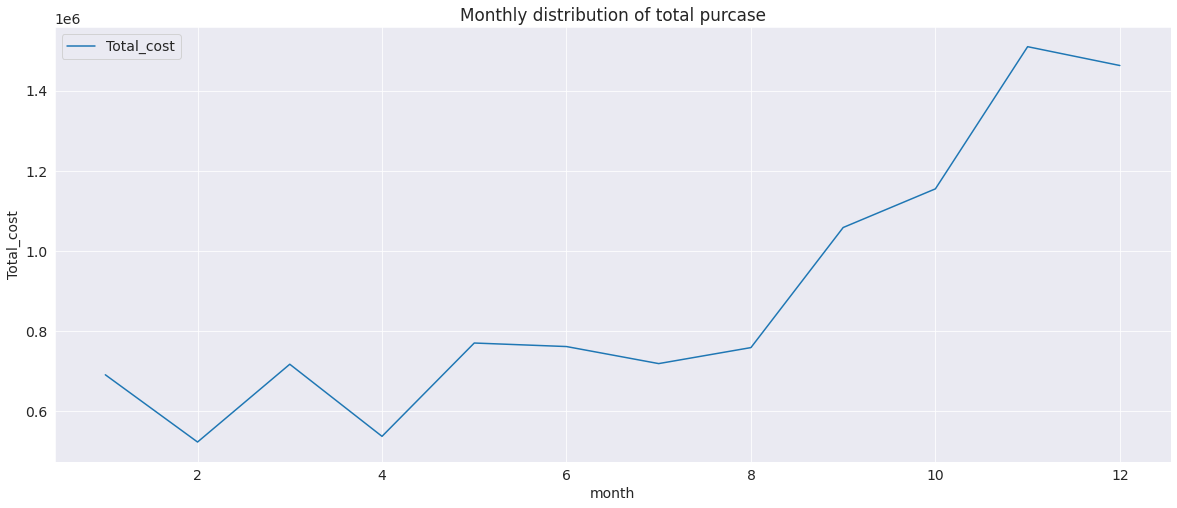

In [72]:
c.plot(ylabel='Total_cost',figsize = (20,8),kind='line',title='Monthly distribution of total purcase',legend=True)

We will use Heat Map to depict Distribution of Order based on the weekday and Month.

In [87]:
b=df1.groupby(by=['month','weekday'])['Total_cost'].sum().unstack(level=0)
b

month,1,2,3,4,5,6,7,8,9,10,11,12
weekday,,,,,,,,,,,,
0,103276.24,110802.90,98268.34,111633.690,102236.59,94777.02,132976.610,91662.00,145500.521,272800.26,307272.61,208368.26
1,209737.19,122359.00,177157.57,111101.200,198575.48,138823.42,138848.071,131359.69,229401.940,188030.39,284348.43,248890.23
2,103185.11,89749.48,118654.94,96459.690,120122.96,156872.32,107940.650,184820.97,150316.250,188385.70,318205.22,216434.52
3,105985.32,87558.80,173462.20,109734.140,160173.76,183840.05,155136.120,215870.39,248541.140,218751.99,246651.51,297455.82
4,129144.44,84839.78,104547.98,79297.271,122036.50,119745.82,94508.850,96745.96,185080.670,193930.68,220332.65,410129.63
6,40036.26,28321.93,45548.33,29582.630,67390.73,67681.27,89810.890,38679.37,99749.651,93080.28,132685.91,81260.36


<AxesSubplot:title={'center':'Distribution of Order based on the weekday and Month'}, xlabel='month', ylabel='weekday'>

<Figure size 1800x720 with 0 Axes>

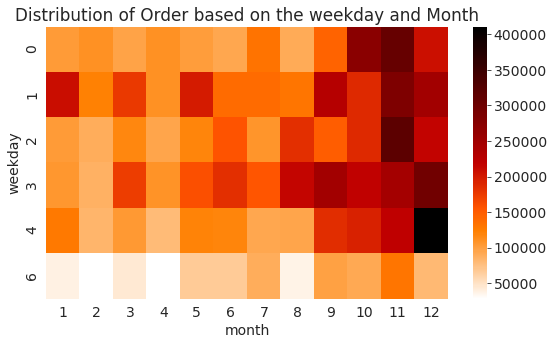

In [88]:
plt.figure(figsize=(25, 10))
b.plot(title="Distribution of Order based on the weekday and Month",legend=False)
sns.heatmap(b, cmap='gist_heat_r')

We are using a Pie chart to demonstrate "Country wise distribution of total purchase".

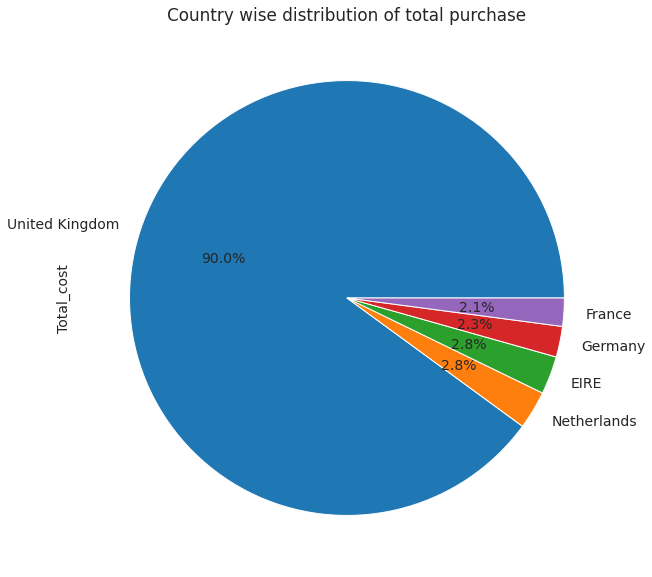

In [90]:
c=df1.groupby(by='Country')[['Total_cost']].sum()

d=c.sort_values(by='Total_cost', ascending=False).head(5)

plot = d.plot.pie(y='Total_cost', figsize=(25,10),autopct='%1.1f%%', legend = False,title='Country wise distribution of total purchase')

We are using a Bar graph to show how the purchase varies on different days on the Week.

In [91]:
c=df1.groupby(by='weekday')[['Total_cost']].sum()

<AxesSubplot:title={'center':'daywise distribution of total purcase'}, xlabel='weekday', ylabel='Total_cost'>

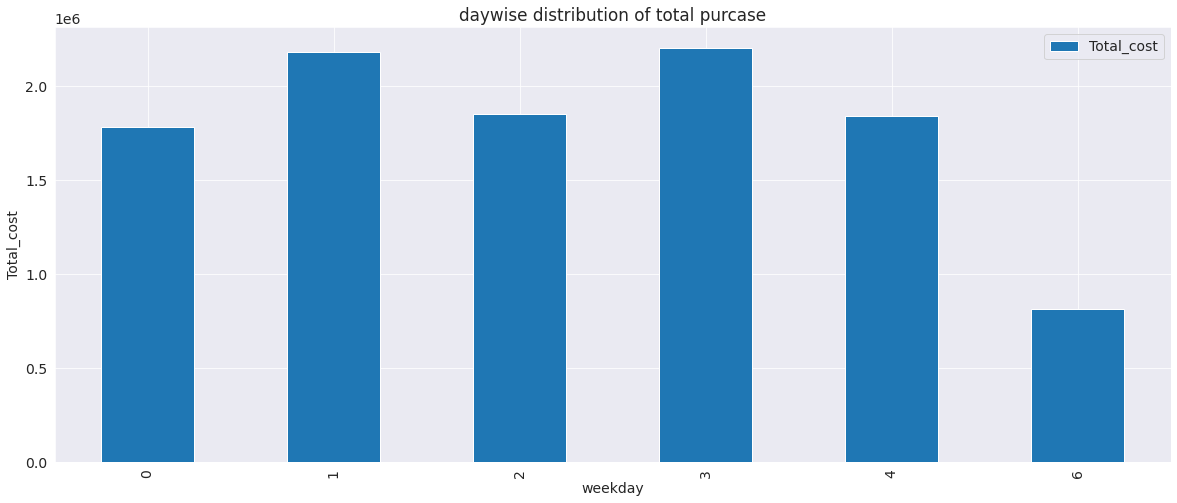

In [92]:
c.plot(ylabel='Total_cost',figsize = (20,8),kind='bar',title='daywise distribution of total purcase',legend=True)

In [93]:
import jovian

In [94]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailatpramit/ecommerce-data-analytics" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/mailatpramit/ecommerce-data-analytics


'https://jovian.ai/mailatpramit/ecommerce-data-analytics'

## Asking and Answering Questions

We will ask questions and try to answer them based on the data and graph we have prepared.


#### Q1: Find the average quantity which is ordered by each customer.

In [95]:
qty=df1[df1['Quantity']>0]['Quantity']
a,b,c=qty.mean(),qty.max(),qty.min()
print("The average,max and min  no of quantity ordered are ",a,",",b,",",c)


The average,max and min  no of quantity ordered are  10.655262241546438 , 80995 , 1


Seeing the average quantity ordered it can be assumed that most people were wholesale buyers. 

#### Q2: what are the top 5 dates on which the most order happended.

In [96]:
df1['Dates'] = pd.to_datetime(df1['InvoiceDate']).dt.date
c=df1.groupby(by='Dates')[['Quantity']].sum()
c.sort_values(by='Quantity',ascending=False).head(5)

,Quantity
Dates,
2011-10-05,46161
2011-11-14,45959
2011-12-05,44119
2011-09-20,43702
2011-10-20,40802


So as per the output the maximum order happened were around end of the year.

#### Q3: What is the top 5 duration on maximum order happened?

In [97]:
df1['Time'] = pd.to_datetime(df1['InvoiceDate']).dt.time
c=df1.groupby(by='Time')[['Quantity']].sum()
c.sort_values(by='Quantity',ascending=False).head(5)

,Quantity
Time,
09:15:00,85388
10:01:00,81271
12:03:00,30284
13:37:00,25220
10:32:00,24760


Seeing the output ,it seems like most order happened in the morning of in early afternoon.

#### Q4: What is the count of the correct,Cancelled and Faulty orders.

In [98]:
c=df1.data_info.value_counts()
c

correct_item      531285
Cancelled_item      9288
Faulty_item         1336
Name: data_info, dtype: int64

#### Q5:What is the average quantity which is ordered by each day.

In [99]:
Day=df1['day']
a,b,c=Day.mean(),Day.max(),Day.min()
print("The average,max and min  no of quantity ordered on a day are ",a,",",b,",",c)

The average,max and min  no of quantity ordered on a day are  15.023096128685813 , 31 , 1


In [100]:
import jovian

In [101]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailatpramit/ecommerce-data-analytics" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/mailatpramit/ecommerce-data-analytics


'https://jovian.ai/mailatpramit/ecommerce-data-analytics'

## Inferences and Conclusion

The data shown represents that the most orders were made on ecommerce site at around Christmas and newyear.Also around half million people ordered in span of 1 year(2010 -2011) with aroun total transaction of around 106 million dollars.

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mailatpramit/ecommerce-data-analytics" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/mailatpramit/ecommerce-data-analytics


'https://jovian.ai/mailatpramit/ecommerce-data-analytics'

## References and Future Work

We can fetch the data for reacent years and compare it with data of 2010-2011 and observe the changes!!!!

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()